In [ ]:
!pip install keras --user

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e4c22f90>,
      dtype=object)

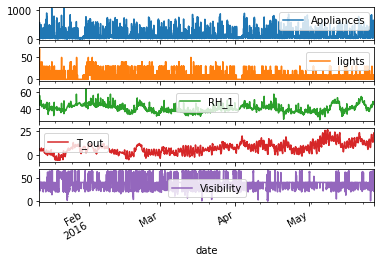

In [ ]:
df.set_index('date')[['Appliances', 'lights','RH_1','T_out','Visibility']].plot(subplots=True)

In [ ]:
df_input = df[['Appliances','RH_1','T_out','Visibility']]

In [ ]:
df_input

,Appliances,RH_1,T_out,Visibility
0,60,47.596667,6.600000,63.000000
1,60,46.693333,6.483333,59.166667
2,50,46.300000,6.366667,55.333333
3,50,46.066667,6.250000,51.500000
4,60,46.333333,6.133333,47.666667
...,...,...,...,...
19730,100,46.560000,22.733333,23.666667
19731,90,46.500000,22.600000,24.500000
19732,270,46.596667,22.466667,25.333333
19733,420,46.990000,22.333333,26.166667


In [ ]:
df_input.describe()

,Appliances,RH_1,T_out,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,40.259739,7.411665,38.330834
std,102.524891,3.979299,5.317409,11.794719
min,10.000000,27.023333,-5.000000,1.000000
25%,50.000000,37.333333,3.666667,29.000000
50%,60.000000,39.656667,6.916667,40.000000
75%,100.000000,43.066667,10.408333,40.000000
max,1080.000000,63.360000,26.100000,66.000000


In [ ]:
df_input.query("Appliances > 100")

,Appliances,RH_1,T_out,Visibility
10,230,45.863333,5.966667,40.000000
11,580,46.396667,5.983333,40.000000
12,430,48.000000,6.000000,40.000000
13,250,52.726667,6.000000,40.000000
19,140,49.800000,6.000000,40.000000
...,...,...,...,...
19727,120,47.456667,22.966667,22.166667
19728,110,47.193333,23.000000,22.000000
19732,270,46.596667,22.466667,25.333333
19733,420,46.990000,22.333333,26.166667


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.04672897, 0.56618659, 0.37299035, 0.95384615],
       [0.04672897, 0.54132648, 0.36923901, 0.89487179],
       [0.03738318, 0.53050179, 0.36548767, 0.83589744],
       ...,
       [0.24299065, 0.53866618, 0.88317256, 0.37435897],
       [0.38317757, 0.54949087, 0.87888532, 0.38717949],
       [0.39252336, 0.53875791, 0.87459807, 0.4       ]])

In [ ]:
features = data_scaled
target = data_scaled[:,0]

In [ ]:
target

array([0.04672897, 0.04672897, 0.03738318, ..., 0.24299065, 0.38317757,
       0.39252336])

In [ ]:
target[2]

0.03738317757009346

In [ ]:
TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0.04672897, 0.56618659, 0.37299035, 0.95384615],
         [0.04672897, 0.54132648, 0.36923901, 0.89487179]]]),
 array([0.03738318]))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,
                                                 random_state=123,shuffle=False)

In [ ]:
x_train.shape,x_test.shape

((15788, 4), (3947, 4))

In [ ]:
win_length = 720
batch_size = 32
num_features = 4
train_generator = TimeseriesGenerator(x_train,y_train,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.04672897, 0.56618659, 0.37299035, 0.95384615],
         [0.04672897, 0.54132648, 0.36923901, 0.89487179],
         [0.03738318, 0.53050179, 0.36548767, 0.83589744],
         ...,
         [0.06542056, 0.31584258, 0.25241158, 0.79230769],
         [0.05607477, 0.31309054, 0.23901393, 0.72820513],
         [0.06542056, 0.31107238, 0.22561629, 0.66410256]],
 
        [[0.04672897, 0.54132648, 0.36923901, 0.89487179],
         [0.03738318, 0.53050179, 0.36548767, 0.83589744],
         [0.03738318, 0.52408036, 0.36173633, 0.77692308],
         ...,
         [0.05607477, 0.31309054, 0.23901393, 0.72820513],
         [0.06542056, 0.31107238, 0.22561629, 0.66410256],
         [0.06542056, 0.30923768, 0.21221865, 0.6       ]],
 
        [[0.03738318, 0.53050179, 0.36548767, 0.83589744],
         [0.03738318, 0.52408036, 0.36173633, 0.77692308],
         [0.04672897, 0.53141914, 0.35798499, 0.71794872],
         ...,
         [0.06542056, 0.31107238, 0.22561629, 0.66410256],
        

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=50,
                              validation_data=test_generator,
                              shuffle=False,callbacks=[early_stopping])

Epoch 1/50
371/471 [======================>.......] - ETA: 7s - loss: 0.0124 - mean_absolute_error: 0.0645

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_generator,verbose=0)

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
predictions.shape

In [ ]:
predictions

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
x_test[:,1:][win_length:]

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)
rev_trans

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]
df_final

In [ ]:
df_final.count()

In [ ]:
df_final['App_Pred'] = rev_trans[:,0]
df_final

In [ ]:
print(0)

# New 


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/final2.csv').drop(columns=['Unnamed: 0'])
df

,date,pos_like,pos_retweet,neg_like,neg_retweet,volume,PSL_Z0,PSL_Z1,PSL_Z2,PSL_Z3,NSL_Z0,NSL_Z1,NSL_Z2,NSL_Z3,PL_0,PL_1,PL_2,PL_3,PL_4,PL_5,PL_6
0,2017-12-07,170467,58223,77553,22751,820,4.138242,4.402125,2.089227,1.212505,4.763030,4.552157,1.953291,1.335755,16850.31,13749.57,11667.13,11623.91,11246.21,10912.73,10861.47
1,2017-12-08,244063,119328,86739,20707,831,4.402125,2.089227,1.212505,2.171277,4.552157,1.953291,1.335755,2.231058,16047.61,16850.31,13749.57,11667.13,11623.91,11246.21,10912.73
2,2017-12-09,81752,48209,148407,28418,479,2.089227,1.212505,2.171277,2.429776,1.953291,1.335755,2.231058,2.683806,14843.42,16047.61,16850.31,13749.57,11667.13,11623.91,11246.21
3,2017-12-10,57441,15913,63437,26220,372,1.212505,2.171277,2.429776,1.690242,1.335755,2.231058,2.683806,1.770365,15059.60,14843.42,16047.61,16850.31,13749.57,11667.13,11623.91
4,2017-12-11,52096,23613,27571,9801,512,2.171277,2.429776,1.690242,1.506788,2.231058,2.683806,1.770365,1.741699,16732.47,15059.60,14843.42,16047.61,16850.31,13749.57,11667.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2021-03-08,180648,46127,50161,6048,392,1.510092,2.653182,2.054924,1.860036,1.257180,2.441838,1.976041,1.612750,52405.02,50964.18,48892.80,48775.37,48363.74,50392.55,48501.21
1188,2021-03-09,242961,40182,66433,9094,553,2.653182,2.054924,1.860036,3.379732,2.441838,1.976041,1.612750,3.179926,54928.70,52405.02,50964.18,48892.80,48775.37,48363.74,50392.55
1189,2021-03-10,198490,35017,97787,12512,484,2.054924,1.860036,3.379732,7.877125,1.976041,1.612750,3.179926,7.216424,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37,48363.74
1190,2021-03-11,179728,54562,57531,7663,445,1.860036,3.379732,7.877125,5.493240,1.612750,3.179926,7.216424,5.090578,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1192 non-null   object 
 1   pos_like     1192 non-null   int64  
 2   pos_retweet  1192 non-null   int64  
 3   neg_like     1192 non-null   int64  
 4   neg_retweet  1192 non-null   int64  
 5   volume       1192 non-null   int64  
 6   PSL_Z0       1192 non-null   float64
 7   PSL_Z1       1192 non-null   float64
 8   PSL_Z2       1192 non-null   float64
 9   PSL_Z3       1192 non-null   float64
 10  NSL_Z0       1192 non-null   float64
 11  NSL_Z1       1192 non-null   float64
 12  NSL_Z2       1192 non-null   float64
 13  NSL_Z3       1192 non-null   float64
 14  PL_0         1192 non-null   float64
 15  PL_1         1192 non-null   float64
 16  PL_2         1192 non-null   float64
 17  PL_3         1192 non-null   float64
 18  PL_4         1192 non-null   float64
 19  PL_5  

In [ ]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1192 non-null   datetime64[ns]
 1   pos_like     1192 non-null   int64         
 2   pos_retweet  1192 non-null   int64         
 3   neg_like     1192 non-null   int64         
 4   neg_retweet  1192 non-null   int64         
 5   volume       1192 non-null   int64         
 6   PSL_Z0       1192 non-null   float64       
 7   PSL_Z1       1192 non-null   float64       
 8   PSL_Z2       1192 non-null   float64       
 9   PSL_Z3       1192 non-null   float64       
 10  NSL_Z0       1192 non-null   float64       
 11  NSL_Z1       1192 non-null   float64       
 12  NSL_Z2       1192 non-null   float64       
 13  NSL_Z3       1192 non-null   float64       
 14  PL_0         1192 non-null   float64       
 15  PL_1         1192 non-null   float64       
 16  PL_2  

In [ ]:
len(df.columns.to_list())

21

In [ ]:
df = df[['PL_0','date', 'pos_like', 'pos_retweet', 'neg_like', 'neg_retweet', 'volume',
       'PSL_Z0', 'PSL_Z1', 'PSL_Z2', 'PSL_Z3', 'NSL_Z0', 'NSL_Z1', 'NSL_Z2',
       'NSL_Z3', 'PL_1', 'PL_2', 'PL_3', 'PL_4', 'PL_5', 'PL_6']]
df

,PL_0,date,pos_like,pos_retweet,neg_like,neg_retweet,volume,PSL_Z0,PSL_Z1,PSL_Z2,PSL_Z3,NSL_Z0,NSL_Z1,NSL_Z2,NSL_Z3,PL_1,PL_2,PL_3,PL_4,PL_5,PL_6
0,16850.31,2017-12-07,170467,58223,77553,22751,820,4.138242,4.402125,2.089227,1.212505,4.763030,4.552157,1.953291,1.335755,13749.57,11667.13,11623.91,11246.21,10912.73,10861.47
1,16047.61,2017-12-08,244063,119328,86739,20707,831,4.402125,2.089227,1.212505,2.171277,4.552157,1.953291,1.335755,2.231058,16850.31,13749.57,11667.13,11623.91,11246.21,10912.73
2,14843.42,2017-12-09,81752,48209,148407,28418,479,2.089227,1.212505,2.171277,2.429776,1.953291,1.335755,2.231058,2.683806,16047.61,16850.31,13749.57,11667.13,11623.91,11246.21
3,15059.60,2017-12-10,57441,15913,63437,26220,372,1.212505,2.171277,2.429776,1.690242,1.335755,2.231058,2.683806,1.770365,14843.42,16047.61,16850.31,13749.57,11667.13,11623.91
4,16732.47,2017-12-11,52096,23613,27571,9801,512,2.171277,2.429776,1.690242,1.506788,2.231058,2.683806,1.770365,1.741699,15059.60,14843.42,16047.61,16850.31,13749.57,11667.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,52405.02,2021-03-08,180648,46127,50161,6048,392,1.510092,2.653182,2.054924,1.860036,1.257180,2.441838,1.976041,1.612750,50964.18,48892.80,48775.37,48363.74,50392.55,48501.21
1188,54928.70,2021-03-09,242961,40182,66433,9094,553,2.653182,2.054924,1.860036,3.379732,2.441838,1.976041,1.612750,3.179926,52405.02,50964.18,48892.80,48775.37,48363.74,50392.55
1189,55893.31,2021-03-10,198490,35017,97787,12512,484,2.054924,1.860036,3.379732,7.877125,1.976041,1.612750,3.179926,7.216424,54928.70,52405.02,50964.18,48892.80,48775.37,48363.74
1190,57809.41,2021-03-11,179728,54562,57531,7663,445,1.860036,3.379732,7.877125,5.493240,1.612750,3.179926,7.216424,5.090578,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37


In [ ]:
df.describe()

,PL_0,pos_like,pos_retweet,neg_like,neg_retweet,volume,PSL_Z0,PSL_Z1,PSL_Z2,PSL_Z3,NSL_Z0,NSL_Z1,NSL_Z2,NSL_Z3,PL_1,PL_2,PL_3,PL_4,PL_5,PL_6
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,10831.932299,40894.320470,10750.358221,16841.588087,3049.818792,191.395973,-0.015300,-0.012164,-0.011248,-0.008917,-0.014184,-0.012126,-0.011674,-0.009453,10795.433431,10756.723465,10719.584706,10682.938322,10648.129354,10614.486141
std,8944.966658,68664.409567,30491.062591,26460.094861,4214.890936,135.238941,0.951291,0.970958,0.975626,0.983933,0.958678,0.971491,0.973738,0.981213,8843.565950,8737.960278,8639.479835,8543.915268,8457.880816,8376.749445
min,3232.510000,5243.000000,1228.000000,845.000000,246.000000,47.000000,-1.061366,-1.061366,-1.061366,-1.061366,-0.991997,-0.991997,-0.991997,-0.991997,3232.510000,3232.510000,3232.510000,3232.510000,3232.510000,3232.510000
25%,6628.082500,14670.500000,4261.250000,5557.500000,1204.500000,121.000000,-0.520619,-0.520619,-0.520619,-0.520619,-0.511478,-0.511478,-0.511478,-0.511478,6628.082500,6628.082500,6628.082500,6628.082500,6628.082500,6628.082500
50%,8719.070000,21415.000000,6207.500000,8471.000000,1757.500000,153.000000,-0.286318,-0.286318,-0.286318,-0.286318,-0.297198,-0.297198,-0.297198,-0.297198,8719.070000,8719.070000,8719.070000,8719.070000,8719.070000,8719.070000
75%,10772.925000,33644.500000,9964.000000,14375.500000,3021.250000,198.000000,0.060478,0.060478,0.060478,0.060478,0.034152,0.034152,0.034152,0.034152,10772.925000,10772.925000,10772.925000,10772.925000,10772.925000,10772.925000
max,57809.410000,996683.000000,977496.000000,301400.000000,68470.000000,1280.000000,7.924779,7.924779,7.924779,7.924779,8.710666,8.710666,8.710666,8.710666,57809.410000,57469.950000,57469.950000,57469.950000,57469.950000,57469.950000


In [ ]:
df_input = df.drop(columns=['date','pos_retweet','neg_retweet'])

In [ ]:
df_input

,PL_0,pos_like,neg_like,volume,PSL_Z0,PSL_Z1,PSL_Z2,PSL_Z3,NSL_Z0,NSL_Z1,NSL_Z2,NSL_Z3,PL_1,PL_2,PL_3,PL_4,PL_5,PL_6
0,16850.31,170467,77553,820,4.138242,4.402125,2.089227,1.212505,4.763030,4.552157,1.953291,1.335755,13749.57,11667.13,11623.91,11246.21,10912.73,10861.47
1,16047.61,244063,86739,831,4.402125,2.089227,1.212505,2.171277,4.552157,1.953291,1.335755,2.231058,16850.31,13749.57,11667.13,11623.91,11246.21,10912.73
2,14843.42,81752,148407,479,2.089227,1.212505,2.171277,2.429776,1.953291,1.335755,2.231058,2.683806,16047.61,16850.31,13749.57,11667.13,11623.91,11246.21
3,15059.60,57441,63437,372,1.212505,2.171277,2.429776,1.690242,1.335755,2.231058,2.683806,1.770365,14843.42,16047.61,16850.31,13749.57,11667.13,11623.91
4,16732.47,52096,27571,512,2.171277,2.429776,1.690242,1.506788,2.231058,2.683806,1.770365,1.741699,15059.60,14843.42,16047.61,16850.31,13749.57,11667.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,52405.02,180648,50161,392,1.510092,2.653182,2.054924,1.860036,1.257180,2.441838,1.976041,1.612750,50964.18,48892.80,48775.37,48363.74,50392.55,48501.21
1188,54928.70,242961,66433,553,2.653182,2.054924,1.860036,3.379732,2.441838,1.976041,1.612750,3.179926,52405.02,50964.18,48892.80,48775.37,48363.74,50392.55
1189,55893.31,198490,97787,484,2.054924,1.860036,3.379732,7.877125,1.976041,1.612750,3.179926,7.216424,54928.70,52405.02,50964.18,48892.80,48775.37,48363.74
1190,57809.41,179728,57531,445,1.860036,3.379732,7.877125,5.493240,1.612750,3.179926,7.216424,5.090578,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.24951582, 0.16665053, 0.25522117, ..., 0.14775218, 0.14160366,
        0.14065856],
       [0.23480813, 0.24088195, 0.28578463, ..., 0.154716  , 0.14775218,
        0.14160366],
       [0.21274404, 0.07716957, 0.49096505, ..., 0.15551287, 0.154716  ,
        0.14775218],
       ...,
       [0.96489174, 0.19491548, 0.32254329, ..., 0.84185924, 0.83969413,
        0.83210472],
       [1.        , 0.17599149, 0.18860442, ..., 0.8800502 , 0.84185924,
        0.83969413],
       [0.98986403, 0.22729868, 0.31032257, ..., 0.90661561, 0.8800502 ,
        0.84185924]])

In [ ]:
features = data_scaled
target = data_scaled[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,
                                                 random_state=123,shuffle=False)

In [ ]:
# x_val, x_test, y_val, y_test = train_test_split(
#     x_test, y_test, test_size=0.5, random_state=123, shuffle=False)

In [ ]:
# x_train,x_test,x_val

In [ ]:
# x_train.shape,x_test.shape,x_val.shape

In [ ]:
win_length = 7
batch_size = 32
num_features = 18
train_generator = TimeseriesGenerator(x_train,y_train,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)
# val_generator = TimeseriesGenerator(x_val,y_val,
#                                       length=win_length,
#                                       sampling_rate=1,
#                                       batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=100,
                              validation_data=test_generator,
                              shuffle=False,
                    # callbacks=[early_stopping]
                    )

Epoch 1/100
30/30 [==============================] - 4s 39ms/step - loss: 0.0104 - mean_absolute_error: 0.0754 - val_loss: 0.0535 - val_mean_absolute_error: 0.1548
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0390 - val_loss: 0.0510 - val_mean_absolute_error: 0.1543
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0019 - mean_absolute_error: 0.0372 - val_loss: 0.0270 - val_mean_absolute_error: 0.1067
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 9.9853e-04 - mean_absolute_error: 0.0251 - val_loss: 0.0175 - val_mean_absolute_error: 0.0796
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 7.6493e-04 - mean_absolute_error: 0.0197 - val_loss: 0.0393 - val_mean_absolute_error: 0.1282
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 8.4431e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0260 - val_mean_absolute_error: 0.1003
Epoch 7/1

In [ ]:
model.evaluate(test_generator,verbose=0)

[0.008563867770135403, 0.06588435173034668]

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
predictions.shape

(232, 1)

In [ ]:
x_test[:,1:][win_length:]


array([[0.01805656, 0.0072982 , 0.03615977, ..., 0.10936928, 0.11032066,
        0.10960528],
       [0.02352437, 0.00742726, 0.06177904, ..., 0.11358058, 0.10936928,
        0.11032066],
       [0.02482551, 0.00425908, 0.05112875, ..., 0.11624313, 0.11358058,
        0.10936928],
       ...,
       [0.06653655, 0.01058931, 0.06716574, ..., 0.22785202, 0.22802348,
        0.20143318],
       [0.04670984, 0.0088869 , 0.08300644, ..., 0.21397857, 0.22785202,
        0.22802348],
       [0.06965727, 0.01310296, 0.10855584, ..., 0.22596457, 0.21397857,
        0.22785202]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)


In [ ]:
rev_trans = scaler.inverse_transform(df_pred)
rev_trans


array([[  8978.19183032,  23145.        ,  11713.        , ...,
          9164.42      ,   9216.02      ,   9177.22      ],
       [  8961.93884552,  28566.        ,  19413.        , ...,
          9392.83      ,   9164.42      ,   9216.02      ],
       [  9026.74950307,  29856.        ,  16212.        , ...,
          9537.24      ,   9392.83      ,   9164.42      ],
       ...,
       [ 41471.31274736, 198490.        ,  97787.        , ...,
         48892.8       ,  48775.37      ,  48363.74      ],
       [ 42185.86829103, 179728.        ,  57531.        , ...,
         50964.18      ,  48892.8       ,  48775.37      ],
       [ 41066.17955208, 230596.        ,  94114.        , ...,
         52405.02      ,  50964.18      ,  48892.8       ]])

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]
df_final

,PL_0,pos_like,neg_like,volume,PSL_Z0,PSL_Z1,PSL_Z2,PSL_Z3,NSL_Z0,NSL_Z1,NSL_Z2,NSL_Z3,PL_1,PL_2,PL_3,PL_4,PL_5,PL_6
960,9550.23,23145,11713,192,-0.008556,-0.099340,-0.105190,0.691483,-0.032368,-0.188620,-0.049915,0.686491,9615.21,9537.24,9392.83,9164.42,9216.02,9177.22
961,9708.41,28566,19413,172,-0.099340,-0.105190,0.691483,1.061246,-0.188620,-0.049915,0.686491,0.919206,9550.23,9615.21,9537.24,9392.83,9164.42,9216.02
962,9942.01,29856,16212,179,-0.105190,0.691483,1.061246,0.198516,-0.049915,0.686491,0.919206,-0.061010,9708.41,9550.23,9615.21,9537.24,9392.83,9164.42
963,11042.94,51905,29484,291,0.691483,1.061246,0.198516,-0.108667,0.686491,0.919206,-0.061010,-0.229271,9942.01,9708.41,9550.23,9615.21,9537.24,9392.83
964,10933.26,65077,30869,336,1.061246,0.198516,-0.108667,-0.124488,0.919206,-0.061010,-0.229271,-0.125549,11042.94,9942.01,9708.41,9550.23,9615.21,9537.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,52405.02,180648,50161,392,1.510092,2.653182,2.054924,1.860036,1.257180,2.441838,1.976041,1.612750,50964.18,48892.80,48775.37,48363.74,50392.55,48501.21
1188,54928.70,242961,66433,553,2.653182,2.054924,1.860036,3.379732,2.441838,1.976041,1.612750,3.179926,52405.02,50964.18,48892.80,48775.37,48363.74,50392.55
1189,55893.31,198490,97787,484,2.054924,1.860036,3.379732,7.877125,1.976041,1.612750,3.179926,7.216424,54928.70,52405.02,50964.18,48892.80,48775.37,48363.74
1190,57809.41,179728,57531,445,1.860036,3.379732,7.877125,5.493240,1.612750,3.179926,7.216424,5.090578,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37


In [ ]:
df_final['App_Pred'] = rev_trans[:,0]
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PL_0,pos_like,neg_like,volume,PSL_Z0,PSL_Z1,PSL_Z2,PSL_Z3,NSL_Z0,NSL_Z1,NSL_Z2,NSL_Z3,PL_1,PL_2,PL_3,PL_4,PL_5,PL_6,App_Pred
960,9550.23,23145,11713,192,-0.008556,-0.099340,-0.105190,0.691483,-0.032368,-0.188620,-0.049915,0.686491,9615.21,9537.24,9392.83,9164.42,9216.02,9177.22,8978.191830
961,9708.41,28566,19413,172,-0.099340,-0.105190,0.691483,1.061246,-0.188620,-0.049915,0.686491,0.919206,9550.23,9615.21,9537.24,9392.83,9164.42,9216.02,8961.938846
962,9942.01,29856,16212,179,-0.105190,0.691483,1.061246,0.198516,-0.049915,0.686491,0.919206,-0.061010,9708.41,9550.23,9615.21,9537.24,9392.83,9164.42,9026.749503
963,11042.94,51905,29484,291,0.691483,1.061246,0.198516,-0.108667,0.686491,0.919206,-0.061010,-0.229271,9942.01,9708.41,9550.23,9615.21,9537.24,9392.83,9216.047777
964,10933.26,65077,30869,336,1.061246,0.198516,-0.108667,-0.124488,0.919206,-0.061010,-0.229271,-0.125549,11042.94,9942.01,9708.41,9550.23,9615.21,9537.24,9688.851049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,52405.02,180648,50161,392,1.510092,2.653182,2.054924,1.860036,1.257180,2.441838,1.976041,1.612750,50964.18,48892.80,48775.37,48363.74,50392.55,48501.21,38867.738288
1188,54928.70,242961,66433,553,2.653182,2.054924,1.860036,3.379732,2.441838,1.976041,1.612750,3.179926,52405.02,50964.18,48892.80,48775.37,48363.74,50392.55,39836.746366
1189,55893.31,198490,97787,484,2.054924,1.860036,3.379732,7.877125,1.976041,1.612750,3.179926,7.216424,54928.70,52405.02,50964.18,48892.80,48775.37,48363.74,41471.312747
1190,57809.41,179728,57531,445,1.860036,3.379732,7.877125,5.493240,1.612750,3.179926,7.216424,5.090578,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37,42185.868291


In [ ]:
plot_data = pd.DataFrame()

In [ ]:
plot_data['actual_prices'] = df_final['PL_0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][predictions.shape[0]*-1:]
plot_data = plot_data.set_index('date')
plot_data

,actual_prices,pred_prices
date,,
2020-07-24,9550.23,8978.191830
2020-07-25,9708.41,8961.938846
2020-07-26,9942.01,9026.749503
2020-07-27,11042.94,9216.047777
2020-07-28,10933.26,9688.851049
...,...,...
2021-03-08,52405.02,38867.738288
2021-03-09,54928.70,39836.746366
2021-03-10,55893.31,41471.312747


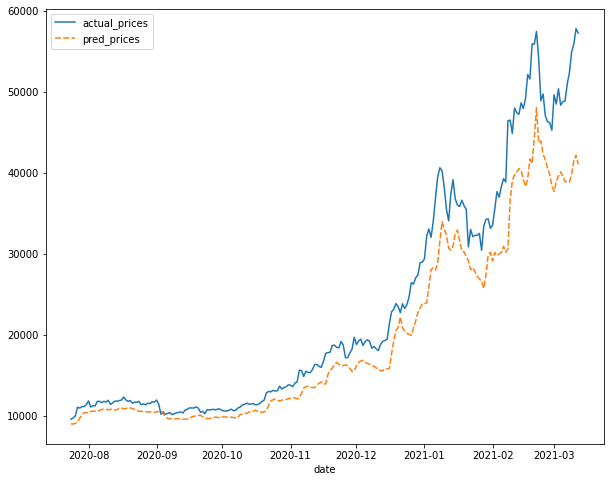

In [ ]:
import seaborn as sns
sns.lineplot(data=plot_data)

#Final Code

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv(
    '/content/drive/MyDrive/DataSet/final2.csv').drop(columns=['Unnamed: 0'])
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df[['PL_0', 'date', 'pos_like', 'pos_retweet', 'neg_like', 'neg_retweet', 'volume',
         'PSL_Z0', 'PSL_Z1', 'PSL_Z2', 'PSL_Z3', 'NSL_Z0', 'NSL_Z1', 'NSL_Z2',
         'NSL_Z3', 'PL_1', 'PL_2', 'PL_3', 'PL_4', 'PL_5', 'PL_6']]
# df = df[['PL_0', 'date','PSL_Z0', 'PSL_Z1', 'PSL_Z2', 'PSL_Z3', 'NSL_Z0', 'NSL_Z1', 'NSL_Z2',
#          'NSL_Z3', 'PL_1', 'PL_2', 'PL_3', 'PL_4', 'PL_5', 'PL_6']]
# df_input = df.drop(columns=['date','pos_like','pos_retweet','neg_like','neg_retweet','volume','PSL_Z0','PSL_Z1','PSL_Z2','PSL_Z3','NSL_Z0','NSL_Z1','NSL_Z2','NSL_Z3'])
# df_input = df.drop(columns=['date','pos_retweet','neg_retweet'])
df_input = df.drop(columns=['date'])

print(df_input.columns)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
features = data_scaled
target = data_scaled[:, 0]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=123, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=0.5, random_state=123, shuffle=False)

# x_train      x_test     x_val
# ((953, 20), (120, 20), (119, 20))


win_length = 7
batch_size = 32
num_features = 20
train_generator = TimeseriesGenerator(x_train, y_train,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)

val_generator = TimeseriesGenerator(x_val, y_val,
                                    length=win_length,
                                    sampling_rate=1,
                                    batch_size=batch_size)

test_generator = TimeseriesGenerator(x_test, y_test,
                                     length=win_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)


all_generator = TimeseriesGenerator(features,target,
                                     length=win_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)

Index(['PL_0', 'pos_like', 'pos_retweet', 'neg_like', 'neg_retweet', 'volume',
       'PSL_Z0', 'PSL_Z1', 'PSL_Z2', 'PSL_Z3', 'NSL_Z0', 'NSL_Z1', 'NSL_Z2',
       'NSL_Z3', 'PL_1', 'PL_2', 'PL_3', 'PL_4', 'PL_5', 'PL_6'],
      dtype='object')


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10,
                                                    mode='auto')
history = model.fit(train_generator,epochs=100,
                              validation_data=test_generator,
                              shuffle=False, callbacks=[early_stopping])

Epoch 1/100
19/19 [==============================] - 5s 104ms/step - loss: 0.0106 - mean_absolute_error: 0.0763 - val_loss: 0.0533 - val_mean_absolute_error: 0.1571
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0069 - mean_absolute_error: 0.0642 - val_loss: 0.0196 - val_mean_absolute_error: 0.0838
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0016 - mean_absolute_error: 0.0285 - val_loss: 0.0014 - val_mean_absolute_error: 0.0258
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0016 - mean_absolute_error: 0.0336 - val_loss: 0.0061 - val_mean_absolute_error: 0.0384
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 8.8702e-04 - mean_absolute_error: 0.0218 - val_loss: 0.0129 - val_mean_absolute_error: 0.0652
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_absolute_error: 0.0247 - val_loss: 0.0028 - val_mean_absolute_error: 0.0291
Epoch 7/100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


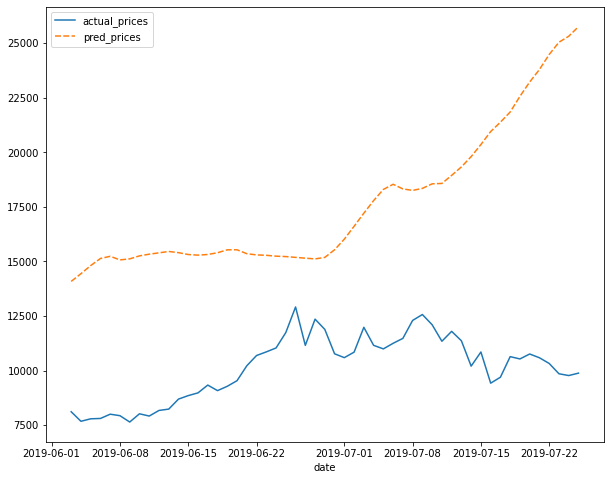

In [ ]:

# Validation DataSet 
model.evaluate(val_generator,verbose=0)
predictions = model.predict(val_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_val[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[(predictions.shape[0]+x_test.shape[0])*-1:x_test.shape[0]*-1]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL_0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')

# print(x_test.shape[0]+x_val.shape[0]-win_length-x_test.shape[0])
# print(predictions.shape[0])
# Plotting the Data
sns.lineplot(data=plot_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


5591.704420992406

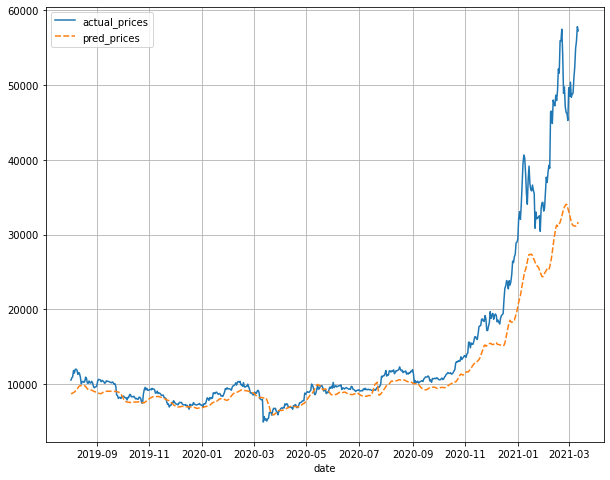

In [ ]:
# Test DataSet
model.evaluate(test_generator,verbose=0)
predictions = model.predict(test_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[predictions.shape[0]*-1:]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL_0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')


# Plotting the Data
sns.lineplot(data=plot_data).grid()
((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1927.3447835928143

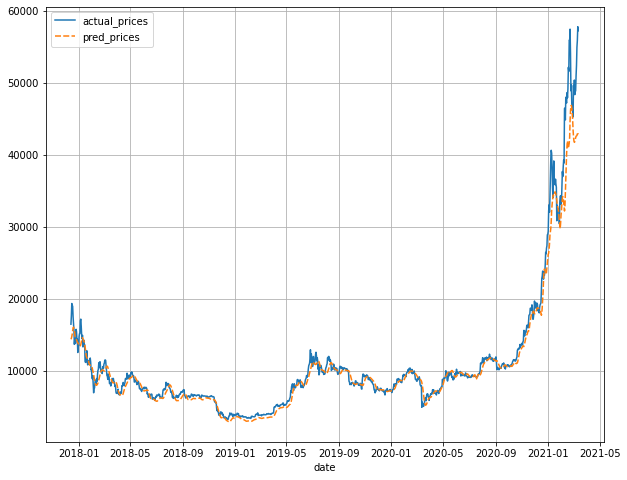

In [ ]:
# Whole DataSet
model.evaluate(all_generator,verbose=0)
predictions = model.predict(all_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[predictions.shape[0]*-1:]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL_0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')


# Plotting the Data
sns.lineplot(data=plot_data).grid()
((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

In [ ]:
model.save('/content/drive/MyDrive/LSTM Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/LSTM Model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LSTM Model/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/LSTM Model')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 7, 128)            76288     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 7, 128)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 7, 128)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv(
    '/content/drive/MyDrive/DataSet/final2.csv').drop(columns=['Unnamed: 0'])
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df[['PL_0', 'date', 'pos_like', 'pos_retweet', 'neg_like', 'neg_retweet', 'volume',
         'PSL_Z0', 'PSL_Z1', 'PSL_Z2', 'PSL_Z3', 'NSL_Z0', 'NSL_Z1', 'NSL_Z2',
         'NSL_Z3', 'PL_1', 'PL_2', 'PL_3', 'PL_4', 'PL_5', 'PL_6']]
df_input = df.drop(columns=['date'])

print(df_input.columns)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
features = data_scaled
target = data_scaled[:, 0]

Index(['PL_0', 'pos_like', 'pos_retweet', 'neg_like', 'neg_retweet', 'volume',
       'PSL_Z0', 'PSL_Z1', 'PSL_Z2', 'PSL_Z3', 'NSL_Z0', 'NSL_Z1', 'NSL_Z2',
       'NSL_Z3', 'PL_1', 'PL_2', 'PL_3', 'PL_4', 'PL_5', 'PL_6'],
      dtype='object')


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)

In [ ]:
x_train.shape,x_test.shape

((1132, 20), (60, 20))

In [ ]:
win_length = 7
batch_size = 32
num_features = 20

test_generator = TimeseriesGenerator(x_test, y_test,
                                     length=win_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


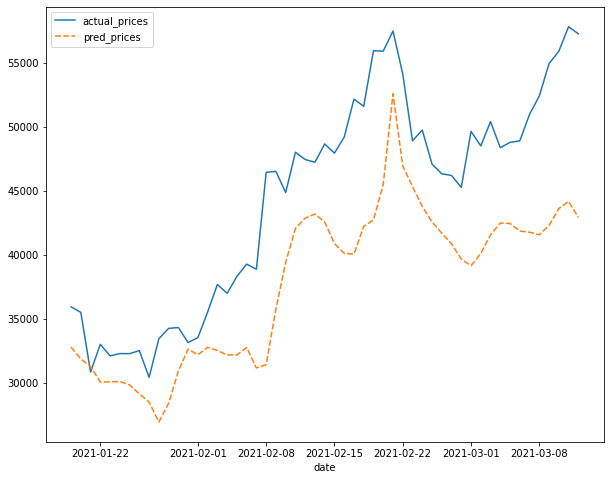

In [ ]:
model.evaluate(test_generator,verbose=0)
predictions = model.predict(test_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[predictions.shape[0]*-1:]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL_0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')

# Plotting the Data
sns.lineplot(data=plot_data)

In [ ]:
print(plot_data.shape)

(53, 2)


#Stock Multi-variate LSTM

In [ ]:
# https://youtu.be/tepxdcepTbY
"""
@author: Sreenivas Bhattiprolu
Code tested on Tensorflow: 2.2.0
    Keras: 2.4.3
dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime


df = pd.read_csv('/content/drive/MyDrive/DataSet/GE.csv')

#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])

#Variables for training
cols = list(df)[1:6]

df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).
trainX = []
trainY = []

n_future = 1   # Number of days we want to predict into the future
n_past = 14     # Number of past days we want to use to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


# define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()

#Forecasting...
#Start with the last day in training date and predict future...
n_future=90  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime


df = pd.read_csv('/content/drive/MyDrive/DataSet/GE.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.751202,0.763722,0.743690,0.748698,0.126780,2156544
1,1962-01-03,0.744942,0.744942,0.738682,0.741186,0.125508,1477632
2,1962-01-04,0.741186,0.747446,0.726162,0.732422,0.124024,1837056
3,1962-01-05,0.732422,0.733674,0.701122,0.713642,0.120844,2725632
4,1962-01-08,0.713642,0.713642,0.691106,0.712390,0.120632,3095040
...,...,...,...,...,...,...,...
14909,2021-03-25,12.400000,12.930000,12.230000,12.850000,12.850000,73391900
14910,2021-03-26,12.950000,13.130000,12.710000,12.990000,12.990000,60452800
14911,2021-03-29,12.920000,13.050000,12.780000,12.950000,12.950000,53762900
14912,2021-03-30,12.980000,13.360000,12.900000,13.300000,13.300000,52925100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14914 entries, 0 to 14913
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14914 non-null  object 
 1   Open       14914 non-null  float64
 2   High       14914 non-null  float64
 3   Low        14914 non-null  float64
 4   Close      14914 non-null  float64
 5   Adj Close  14914 non-null  float64
 6   Volume     14914 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 815.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates = df['Date'][:-90]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14914 entries, 0 to 14913
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14914 non-null  datetime64[ns]
 1   Open       14914 non-null  float64       
 2   High       14914 non-null  float64       
 3   Low        14914 non-null  float64       
 4   Close      14914 non-null  float64       
 5   Adj Close  14914 non-null  float64       
 6   Volume     14914 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 815.7 KB


In [ ]:
cols = list(df)[1:6]
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training

,Open,High,Low,Close,Adj Close
0,0.751202,0.763722,0.743690,0.748698,0.126780
1,0.744942,0.744942,0.738682,0.741186,0.125508
2,0.741186,0.747446,0.726162,0.732422,0.124024
3,0.732422,0.733674,0.701122,0.713642,0.120844
4,0.713642,0.713642,0.691106,0.712390,0.120632
...,...,...,...,...,...
14909,12.400000,12.930000,12.230000,12.850000,12.850000
14910,12.950000,13.130000,12.710000,12.990000,12.990000
14911,12.920000,13.050000,12.780000,12.950000,12.950000
14912,12.980000,13.360000,12.900000,13.300000,13.300000


In [ ]:
df_all = df_for_training
df_for_training = df_for_training[:-90]

In [ ]:
df_for_training

,Open,High,Low,Close,Adj Close
0,0.751202,0.763722,0.743690,0.748698,0.126780
1,0.744942,0.744942,0.738682,0.741186,0.125508
2,0.741186,0.747446,0.726162,0.732422,0.124024
3,0.732422,0.733674,0.701122,0.713642,0.120844
4,0.713642,0.713642,0.691106,0.712390,0.120632
...,...,...,...,...,...
14819,8.760000,8.870000,8.670000,8.760000,8.745500
14820,8.860000,9.250000,8.850000,9.250000,9.234689
14821,9.610000,9.640000,9.420000,9.570000,9.554158
14822,9.450000,9.740000,9.330000,9.680000,9.663977


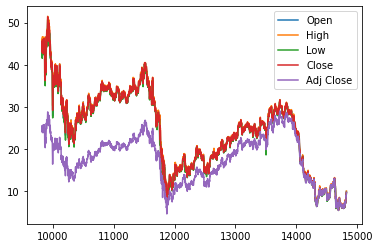

In [ ]:
df_for_training.tail(5000).plot.line()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
df_for_training_scaled

array([[-0.85755055, -0.85684504, -0.85774197, -0.85755636, -0.85970761],
       [-0.85802129, -0.85824196, -0.85812292, -0.85812121, -0.85984782],
       [-0.85830373, -0.8580557 , -0.8590753 , -0.8587802 , -0.86001139],
       ...,
       [-0.19139339, -0.19659971, -0.19774694, -0.19425312,  0.17940118],
       [-0.20342495, -0.18916139, -0.20459311, -0.18598185,  0.1915057 ],
       [-0.16432238, -0.16610262, -0.17416566, -0.18222219,  0.19700768]])

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to predict into the future
n_past = 14     # Number of past days we want to use to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])


In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (14810, 14, 5).
trainY shape == (14810, 1).


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 14, 64)            17920     
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/5
834/834 [==============================] - 56s 68ms/step - loss: 0.0344 - val_loss: 0.0036
Epoch 2/5
834/834 [==============================] - 55s 66ms/step - loss: 0.0288 - val_loss: 0.0036
Epoch 3/5
834/834 [==============================] - 55s 66ms/step - loss: 0.0278 - val_loss: 0.0038
Epoch 4/5
834/834 [==============================] - 55s 65ms/step - loss: 0.0267 - val_loss: 0.0051
Epoch 5/5
834/834 [==============================] - 55s 66ms/step - loss: 0.0266 - val_loss: 0.0016


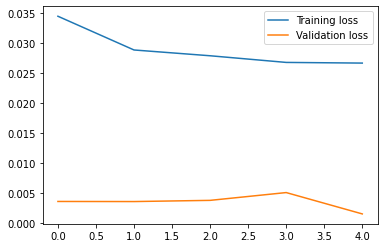

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:

#Forecasting...
#Start with the last day in training date and predict future...
n_future=90  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

In [ ]:
forecast[:5]

array([[-0.37325677],
       [-0.3712058 ],
       [-0.368431  ],
       [-0.36552975],
       [-0.36363646]], dtype=float32)

In [ ]:

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


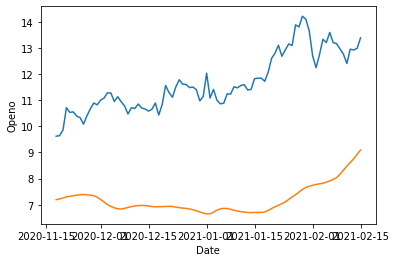

In [ ]:
vis_op = pd.DataFrame({'Date':np.array(forecast_dates), 'Openp':y_pred_future,'Openo':df_all['Open'][-90:]})

sns.lineplot(vis_op['Date'], vis_op['Openo'])
sns.lineplot(vis_op['Date'], vis_op['Openp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


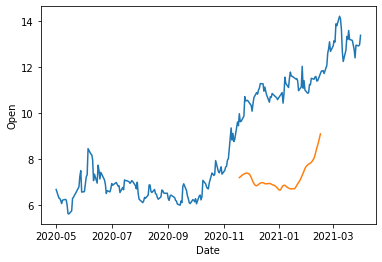

In [ ]:

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

# New Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/final_complete_dataset.csv')
df

,date,pos_likes_count,neg_likes_count,pos_retweets_count,neg_retweets_count,sum_pos_sen,sum_neg_sen,mean_pos_sen,mean_neg_sen,median_pos_sen,median_neg_sen,std_pos_sen,std_neg_sen,skew_pos_sen,skew_neg_sen,kurtosis_pos_sen,kurtosis_neg_sen,tweet_vol,Price Lag 0,Price Lag 1,Price Lag 2,Price Lag 3,Price Lag 4,Price Lag 5,Price Lag 6,zscore_sum_pos_sen,zscore_sum_neg_sen,zscore_mean_pos_sen,zscore_mean_neg_sen,zscore_median_pos_sen,zscore_median_neg_sen,zscore_std_pos_sen,zscore_std_neg_sen,zscore_skew_pos_sen,zscore_skew_neg_sen,zscore_kurtosis_pos_sen,zscore_kurtosis_neg_sen
0,2017-01-01,884,333,580,162,11.441429,6.160855,0.817245,0.770107,0.864431,0.747215,0.122269,0.107939,-1.071271,0.806148,-0.094580,0.148902,22,995.44,963.38,959.04,971.08,972.17,925.78,898.38,-1.089510,-0.921094,2.461681,1.735248,3.332171,0.942551,0.528975,-0.549228,-4.531087,1.384814,2.910988,1.575560
1,2017-01-02,5335,1444,3631,620,41.188336,9.886617,0.762747,0.706187,0.790568,0.698603,0.129751,0.114417,-0.118365,1.120719,-1.211109,0.985415,68,1017.05,995.44,963.38,959.04,971.08,972.17,925.78,-0.741059,-0.816667,-0.320371,-0.765161,0.664541,-0.413446,1.393373,-0.054944,-0.277476,2.314870,-0.615090,2.920141
2,2017-01-03,2104,436,1405,258,23.866358,6.229506,0.723223,0.692167,0.710602,0.635604,0.112787,0.126986,0.425864,1.087090,-0.585921,0.354295,42,1033.30,1017.05,995.44,963.38,959.04,971.08,972.17,-0.943966,-0.919170,-2.338022,-1.313578,-2.223544,-2.170769,-0.566369,0.904036,2.151871,2.215442,1.359297,1.905700
3,2017-01-04,3702,1152,2586,812,36.724756,14.832695,0.749485,0.706319,0.758723,0.708842,0.107360,0.090134,0.080198,0.001365,-0.947776,-1.399742,70,1135.41,1033.30,1017.05,995.44,963.38,959.04,971.08,-0.793345,-0.678036,-0.997387,-0.760003,-0.485569,-0.127817,-1.193307,-1.907694,0.608876,-0.994592,0.216535,-0.913677
4,2017-01-05,3372,2654,2737,1810,46.652301,24.570946,0.740513,0.722675,0.758723,0.716897,0.106673,0.122467,0.030672,0.495685,-0.919614,-0.519497,97,989.35,1135.41,1033.30,1017.05,995.44,963.38,959.04,-0.677055,-0.405088,-1.455402,-0.120188,-0.485569,0.096849,-1.272663,0.559261,0.387804,0.466904,0.305473,0.501198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2021-03-11,196687,76370,57526,9545,282.645730,96.802645,0.772256,0.706589,0.775007,0.689717,0.117061,0.109205,-0.060172,0.436546,-1.011064,-0.895869,503,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37,2.087337,1.619450,0.165058,-0.749447,0.102521,-0.661319,-0.072679,-0.452601,-0.017709,0.292056,0.016665,-0.103768
1531,2021-03-12,260181,112824,57834,15359,424.305062,150.844422,0.760403,0.721744,0.758369,0.698241,0.119769,0.112768,0.052600,0.408921,-1.072969,-0.879554,767,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,3.746714,3.134154,-0.440011,-0.156616,-0.498358,-0.423532,0.240167,-0.180739,0.485683,0.210379,-0.178833,-0.077544
1532,2021-03-13,565079,407073,88071,43004,820.384319,280.555954,0.771038,0.732522,0.774298,0.718339,0.119186,0.119242,-0.093955,0.274106,-1.127463,-1.064358,1447,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,8.386329,6.769759,0.102870,0.265013,0.076936,0.137096,0.172872,0.313227,-0.168514,-0.188213,-0.350930,-0.374592
1533,2021-03-14,322121,137290,68436,18280,606.468292,215.716889,0.767681,0.726319,0.758776,0.707837,0.120114,0.120018,0.012624,0.343325,-1.160040,-1.047035,1087,58998.89,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,5.880548,4.952424,-0.068476,0.022381,-0.483680,-0.155859,0.280062,0.372415,0.307236,0.016440,-0.453811,-0.346748


In [ ]:
df.info()
df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1535 non-null   object 
 1   pos_likes_count          1535 non-null   int64  
 2   neg_likes_count          1535 non-null   int64  
 3   pos_retweets_count       1535 non-null   int64  
 4   neg_retweets_count       1535 non-null   int64  
 5   sum_pos_sen              1535 non-null   float64
 6   sum_neg_sen              1535 non-null   float64
 7   mean_pos_sen             1534 non-null   float64
 8   mean_neg_sen             1532 non-null   float64
 9   median_pos_sen           1534 non-null   float64
 10  median_neg_sen           1532 non-null   float64
 11  std_pos_sen              1534 non-null   float64
 12  std_neg_sen              1528 non-null   float64
 13  skew_pos_sen             1533 non-null   float64
 14  skew_neg_sen            

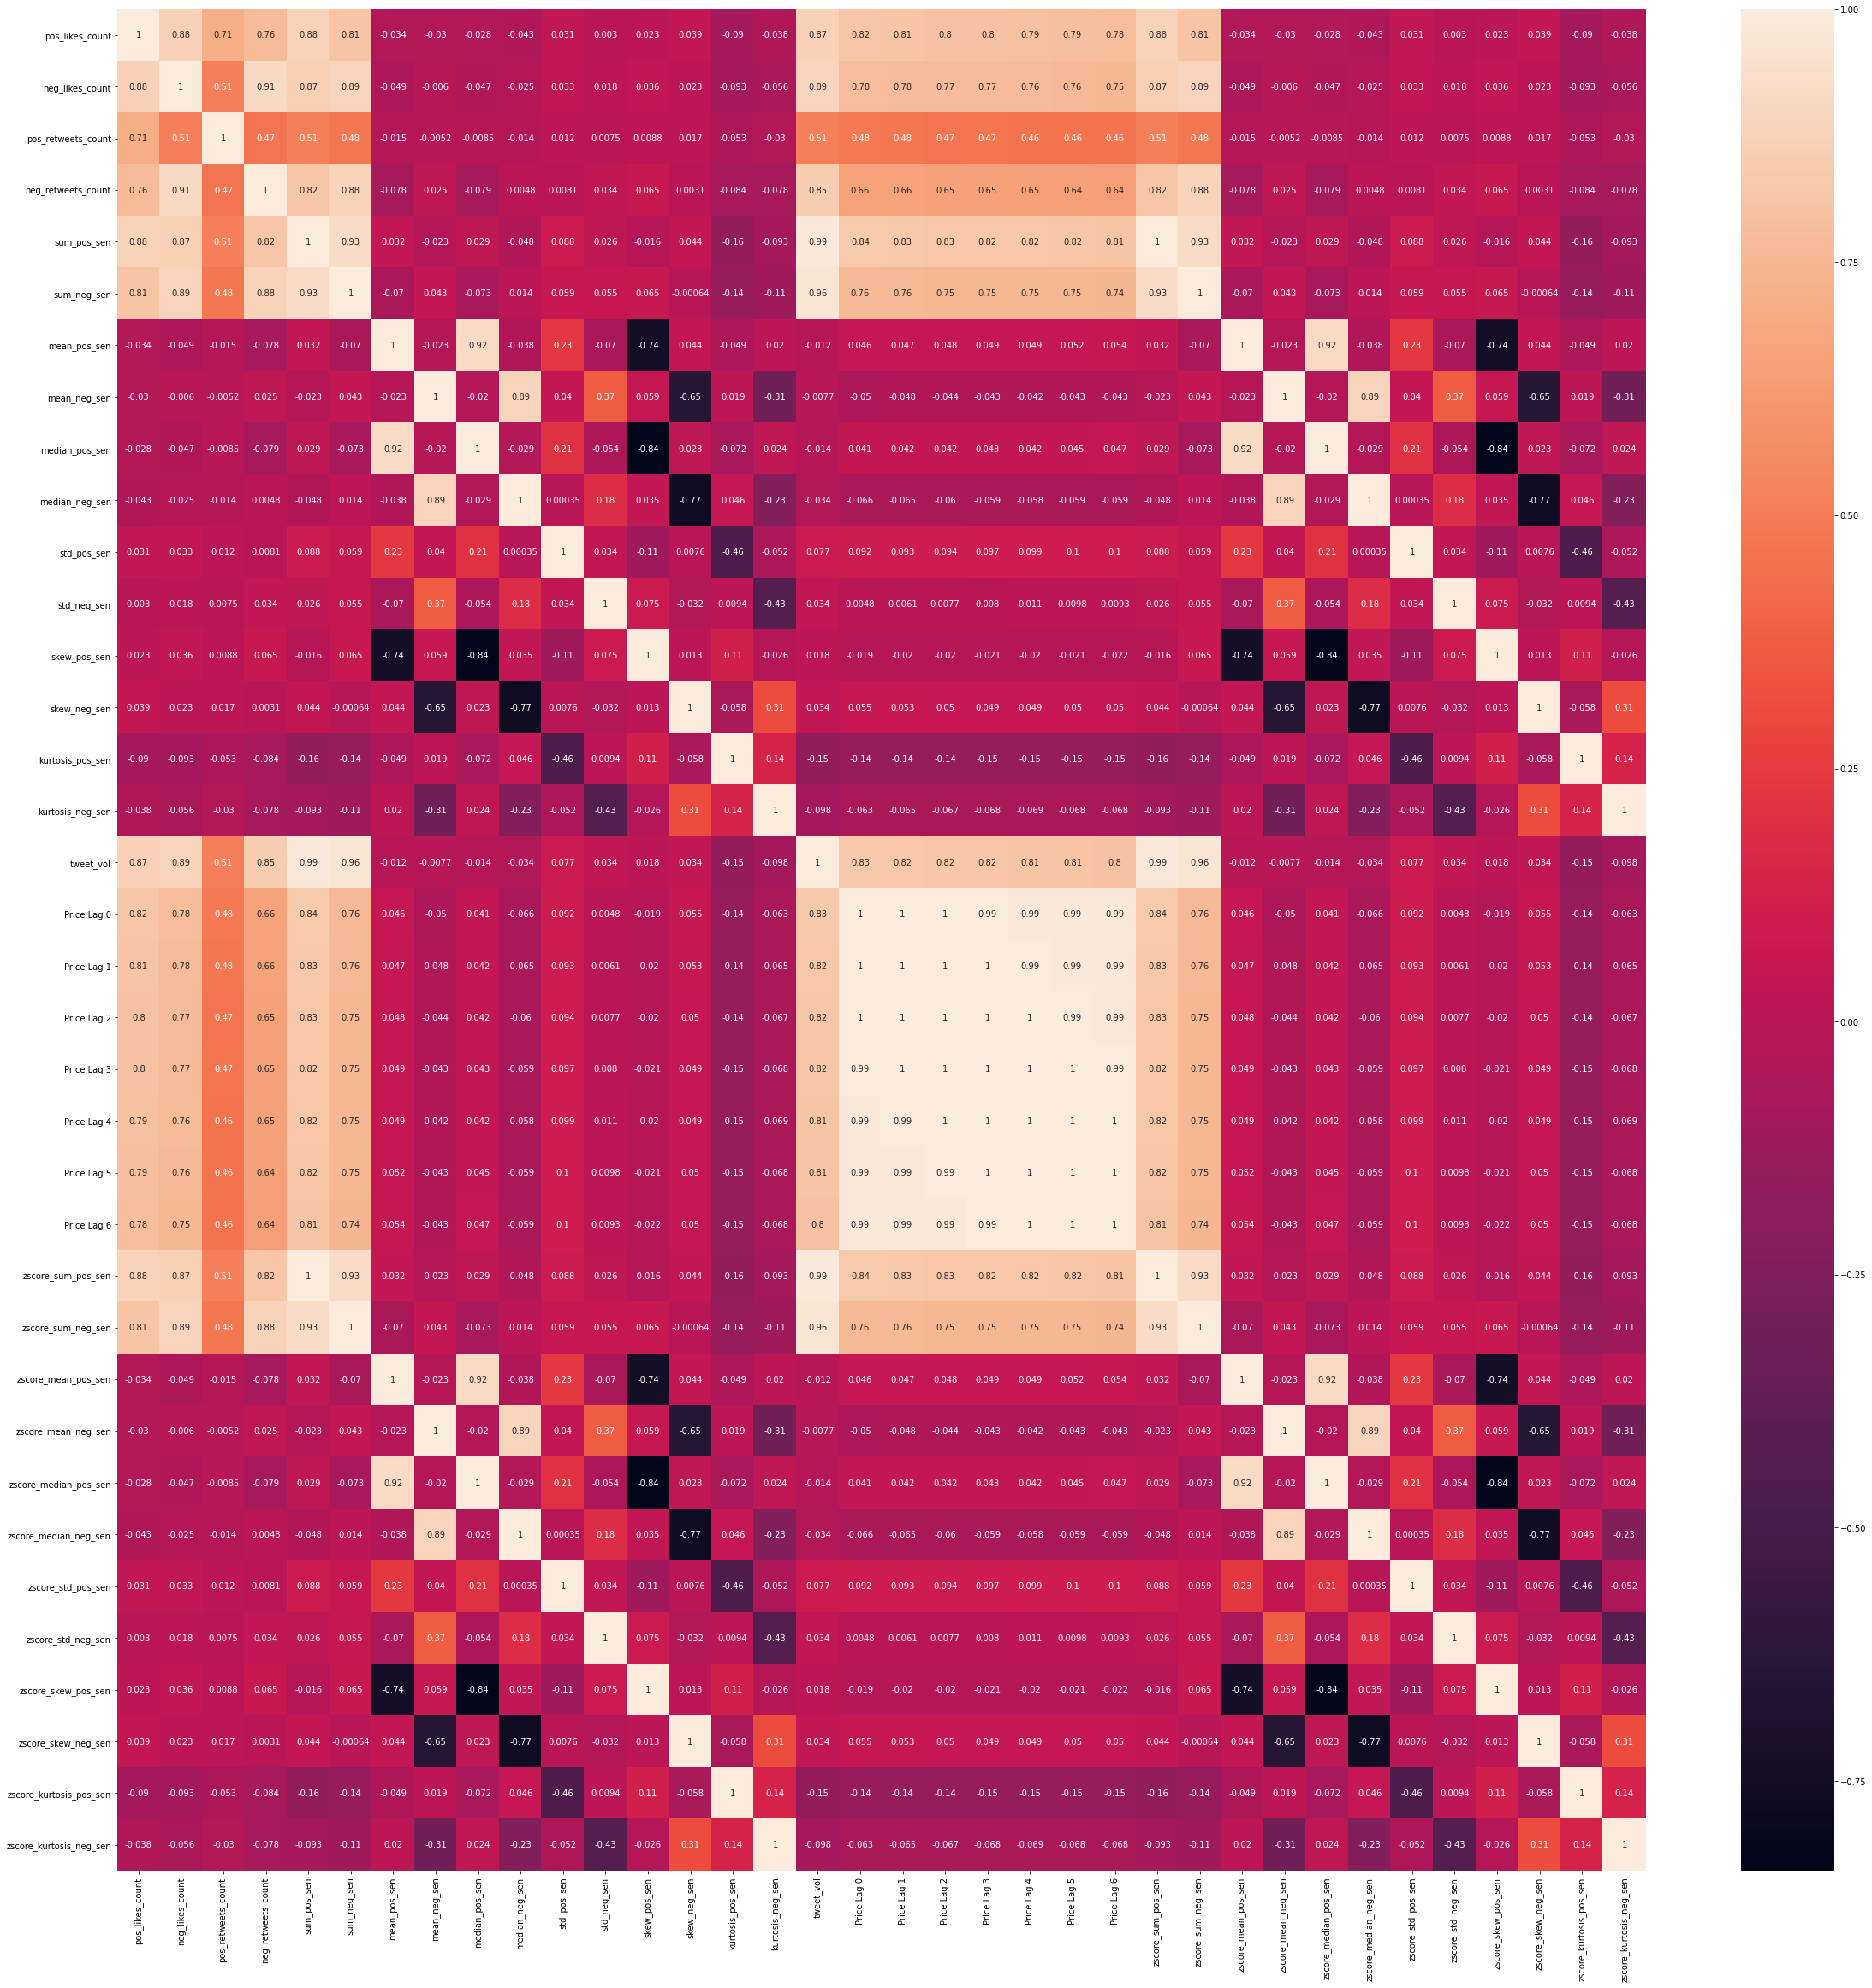

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (40, 40)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot=True, ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


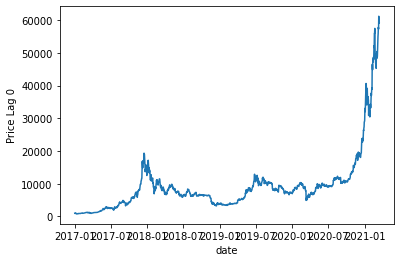

In [ ]:
sns.lineplot(df['date'], df['Price Lag 0'])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/final_complete_dataset.csv')
df = df[['date', 'Price Lag 0', 'pos_likes_count', 'neg_likes_count', 'pos_retweets_count',
       'neg_retweets_count', 'tweet_vol', 'Price Lag 1',
       'Price Lag 2', 'Price Lag 3', 'Price Lag 4', 'Price Lag 5',
       'Price Lag 6', 'zscore_sum_pos_sen', 'zscore_sum_neg_sen']]
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'zscore_sum_pos_sen':'PSZL0','zscore_sum_neg_sen':'NSZL0','Price Lag 0':'PL0', 'Price Lag 1':'PL1',
       'Price Lag 2':'PL2', 'Price Lag 3':'PL3', 'Price Lag 4':'PL4', 'Price Lag 5':'PL5',
       'Price Lag 6':'PL6', })
df['NSZL1'] = df['NSZL0'].shift(periods=1)
df['NSZL2'] = df['NSZL0'].shift(periods=2)
df['NSZL3'] = df['NSZL0'].shift(periods=3)
df['PSZL1'] = df['PSZL0'].shift(periods=1)
df['PSZL2'] = df['PSZL0'].shift(periods=2)
df['PSZL3'] = df['PSZL0'].shift(periods=3)
df = df[3:]

In [ ]:
df = df[['date', 'Price Lag 0', 'pos_likes_count', 'neg_likes_count', 'pos_retweets_count',
       'neg_retweets_count', 'tweet_vol', 'Price Lag 1',
       'Price Lag 2', 'Price Lag 3', 'Price Lag 4', 'Price Lag 5',
       'Price Lag 6', 'zscore_sum_pos_sen', 'zscore_sum_neg_sen']]
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'zscore_sum_pos_sen':'PSZL0','zscore_sum_neg_sen':'NSZL0','Price Lag 0':'PL0', 'Price Lag 1':'PL1',
       'Price Lag 2':'PL2', 'Price Lag 3':'PL3', 'Price Lag 4':'PL4', 'Price Lag 5':'PL5',
       'Price Lag 6':'PL6', })
df['NSZL1'] = df['NSZL0'].shift(periods=1)
df['NSZL2'] = df['NSZL0'].shift(periods=2)
df['NSZL3'] = df['NSZL0'].shift(periods=3)
df['PSZL1'] = df['PSZL0'].shift(periods=1)
df['PSZL2'] = df['PSZL0'].shift(periods=2)
df['PSZL3'] = df['PSZL0'].shift(periods=3)
df = df[3:]

KeyError: ignored

In [ ]:
df = df.rename(columns={'zscore_sum_pos_sen':'PSZL0','zscore_sum_neg_sen':'NSZL0','Price Lag 0':'PL0', 'Price Lag 1':'PL1',
       'Price Lag 2':'PL2', 'Price Lag 3':'PL3', 'Price Lag 4':'PL4', 'Price Lag 5':'PL5',
       'Price Lag 6':'PL6', })
df['NSZL1'] = df['NSZL0'].shift(periods=1)
df['NSZL2'] = df['NSZL0'].shift(periods=2)
df['NSZL3'] = df['NSZL0'].shift(periods=3)
df['PSZL1'] = df['PSZL0'].shift(periods=1)
df['PSZL2'] = df['PSZL0'].shift(periods=2)
df['PSZL3'] = df['PSZL0'].shift(periods=3)
df = df[3:]

In [ ]:
df['NSZL1'] = df['NSZL0'].shift(periods=1)
df['NSZL2'] = df['NSZL0'].shift(periods=2)
df['NSZL3'] = df['NSZL0'].shift(periods=3)
df['PSZL1'] = df['PSZL0'].shift(periods=1)
df['PSZL2'] = df['PSZL0'].shift(periods=2)
df['PSZL3'] = df['PSZL0'].shift(periods=3)
df = df[3:]

In [ ]:
df = df[3:]
df

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


df = pd.read_csv('/content/drive/MyDrive/DataSet/final_complete_dataset.csv')
df = df[['date', 'Price Lag 0', 'pos_likes_count', 'neg_likes_count', 'pos_retweets_count',
       'neg_retweets_count', 'tweet_vol', 'Price Lag 1',
       'Price Lag 2', 'Price Lag 3', 'Price Lag 4', 'Price Lag 5',
       'Price Lag 6', 'zscore_sum_pos_sen', 'zscore_sum_neg_sen']]
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'zscore_sum_pos_sen':'PSZL0','zscore_sum_neg_sen':'NSZL0','Price Lag 0':'PL0', 'Price Lag 1':'PL1',
       'Price Lag 2':'PL2', 'Price Lag 3':'PL3', 'Price Lag 4':'PL4', 'Price Lag 5':'PL5',
       'Price Lag 6':'PL6', })
df['NSZL1'] = df['NSZL0'].shift(periods=1)
df['NSZL2'] = df['NSZL0'].shift(periods=2)
df['NSZL3'] = df['NSZL0'].shift(periods=3)
df['PSZL1'] = df['PSZL0'].shift(periods=1)
df['PSZL2'] = df['PSZL0'].shift(periods=2)
df['PSZL3'] = df['PSZL0'].shift(periods=3)
df = df[3:]
df_input = df.drop(columns=['date'])

print(df_input.columns)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
features = data_scaled
target = data_scaled[:, 0]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=123, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=0.5, random_state=123, shuffle=False)

# x_train      x_test     x_val
# ((953, 20), (120, 20), (119, 20))


win_length = 1
batch_size = 64
num_features = 20
train_generator = TimeseriesGenerator(x_train, y_train,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)

val_generator = TimeseriesGenerator(x_val, y_val,
                                    length=win_length,
                                    sampling_rate=1,
                                    batch_size=batch_size)

test_generator = TimeseriesGenerator(x_test, y_test,
                                     length=win_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)


all_generator = TimeseriesGenerator(features,target,
                                     length=win_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)

Index(['PL0', 'pos_likes_count', 'neg_likes_count', 'pos_retweets_count',
       'neg_retweets_count', 'tweet_vol', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5',
       'PL6', 'PSZL0', 'NSZL0', 'NSZL1', 'NSZL2', 'NSZL3', 'PSZL1', 'PSZL2',
       'PSZL3'],
      dtype='object')


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(100,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(100,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10,
                                                    mode='auto')
history = model.fit(train_generator,epochs=100,
                              validation_data=test_generator,
                              shuffle=False, callbacks=[early_stopping])

Epoch 1/100
20/20 [==============================] - 5s 55ms/step - loss: 0.0053 - mean_absolute_error: 0.0477 - val_loss: 0.1829 - val_mean_absolute_error: 0.3638
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0576 - val_loss: 0.1505 - val_mean_absolute_error: 0.3259
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0581 - val_loss: 0.1269 - val_mean_absolute_error: 0.3010
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0488 - val_loss: 0.0691 - val_mean_absolute_error: 0.2197
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0388 - val_loss: 0.0223 - val_mean_absolute_error: 0.1219
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 8.0447e-04 - mean_absolute_error: 0.0241 - val_loss: 0.0038 - val_mean_absolute_error: 0.0448
Epoch 7/100
20/20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


411.2546652553875

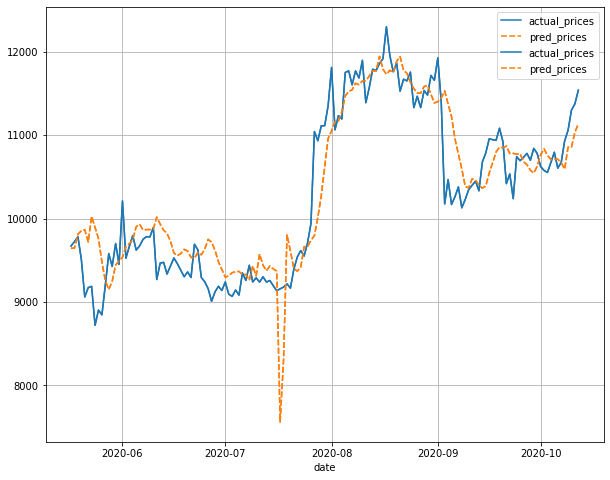

In [ ]:

# Validation DataSet 
model.evaluate(val_generator,verbose=0)
predictions = model.predict(val_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_val[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[(predictions.shape[0]+x_test.shape[0])*-1:x_test.shape[0]*-1]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')

# print(x_test.shape[0]+x_val.shape[0]-win_length-x_test.shape[0])
# print(predictions.shape[0])
# Plotting the Data
sns.lineplot(data=plot_data)

sns.lineplot(data=plot_data).grid()
((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


4143.313819330227

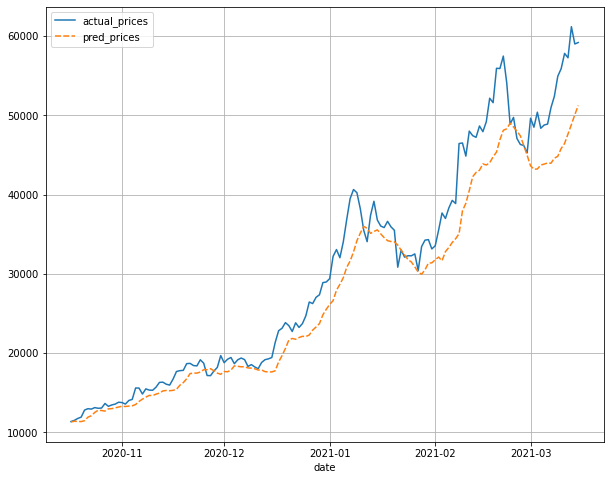

In [ ]:
# Test DataSet
model.evaluate(test_generator,verbose=0)
predictions = model.predict(test_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[predictions.shape[0]*-1:]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')


# Plotting the Data
sns.lineplot(data=plot_data).grid()
((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1420.4105323480105

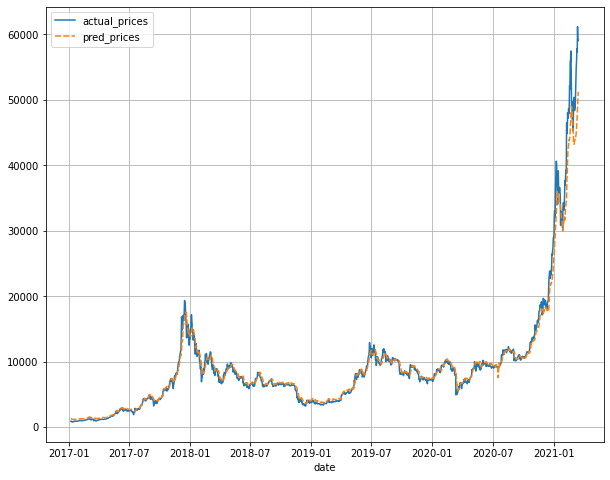

In [ ]:
# Whole DataSet
model.evaluate(all_generator,verbose=0)
predictions = model.predict(all_generator)
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = df_input[predictions.shape[0]*-1:]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['PL0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')


# Plotting the Data
sns.lineplot(data=plot_data).grid()
((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

In [ ]:
model.save('/content/drive/MyDrive/Models/LSTM Model 2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/LSTM Model 2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/LSTM Model 2/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Models/LSTM Model 2')

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


loss_arr = []

In [ ]:
def val_fun(model,val_generator,x_val,x_test,win_length,scaler,df_input) :
  model.evaluate(val_generator,verbose=0)
  predictions = model.predict(val_generator)
  df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_val[:,1:][win_length:])],axis=1)
  rev_trans = scaler.inverse_transform(df_pred)
  df_final = df_input[(predictions.shape[0]+x_test.shape[0])*-1:x_test.shape[0]*-1]
  df_final['App_Pred'] = rev_trans[:,0]
  plot_data = pd.DataFrame()
  plot_data['actual_prices'] = df_final['PL0']
  plot_data['pred_prices'] = df_final['App_Pred']
  plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
  plot_data = plot_data.set_index('date')

  # print(x_test.shape[0]+x_val.shape[0]-win_length-x_test.shape[0])
  # print(predictions.shape[0])
  # Plotting the Data
  sns_plot = sns.lineplot(data=plot_data)
  plt.savefig(f"Plots/val{i}.png")
  plt.clf()

  return ((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

def test_fun(model,test_generator,x_val,x_test,win_length,scaler,df_input) :
  model.evaluate(test_generator,verbose=0)
  predictions = model.predict(test_generator)
  df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
  rev_trans = scaler.inverse_transform(df_pred)
  df_final = df_input[predictions.shape[0]*-1:]
  df_final['App_Pred'] = rev_trans[:,0]
  plot_data = pd.DataFrame()
  plot_data['actual_prices'] = df_final['PL0']
  plot_data['pred_prices'] = df_final['App_Pred']
  plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
  plot_data = plot_data.set_index('date')

  sns_plot = sns.lineplot(data=plot_data)
  plt.savefig(f"Plots/test{i}.png")
  plt.clf()

  return ((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5

def whole_fun(model,whole_generator,x_val,x_test,win_length,scaler,df_input) :
  model.evaluate(all_generator,verbose=0)
  predictions = model.predict(all_generator)
  df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
  rev_trans = scaler.inverse_transform(df_pred)
  df_final = df_input[predictions.shape[0]*-1:]
  df_final['App_Pred'] = rev_trans[:,0]
  plot_data = pd.DataFrame()
  plot_data['actual_prices'] = df_final['PL0']
  plot_data['pred_prices'] = df_final['App_Pred']
  plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
  plot_data = plot_data.set_index('date')

  sns_plot = sns.lineplot(data=plot_data)
  plt.savefig(f"Plots/whole{i}.png")
  plt.clf()

  return ((plot_data['actual_prices']  - plot_data['pred_prices']) ** 2).mean() ** .5


In [ ]:
for i in range(1,30) :
  temp = []    

  df = pd.read_csv('/content/drive/MyDrive/DataSet/final_complete_dataset.csv')
  df = df[['date', 'Price Lag 0', 'pos_likes_count', 'neg_likes_count', 'pos_retweets_count',
        'neg_retweets_count', 'tweet_vol', 'Price Lag 1',
        'Price Lag 2', 'Price Lag 3', 'Price Lag 4', 'Price Lag 5',
        'Price Lag 6', 'zscore_sum_pos_sen', 'zscore_sum_neg_sen']]
  df['date'] = pd.to_datetime(df['date'])
  df = df.rename(columns={'zscore_sum_pos_sen':'PSZL0','zscore_sum_neg_sen':'NSZL0','Price Lag 0':'PL0', 'Price Lag 1':'PL1',
        'Price Lag 2':'PL2', 'Price Lag 3':'PL3', 'Price Lag 4':'PL4', 'Price Lag 5':'PL5',
        'Price Lag 6':'PL6', })
  df['NSZL1'] = df['NSZL0'].shift(periods=1)
  df['NSZL2'] = df['NSZL0'].shift(periods=2)
  df['NSZL3'] = df['NSZL0'].shift(periods=3)
  df['PSZL1'] = df['PSZL0'].shift(periods=1)
  df['PSZL2'] = df['PSZL0'].shift(periods=2)
  df['PSZL3'] = df['PSZL0'].shift(periods=3)
  df = df[3:]
  df_input = df.drop(columns=['date'])

  # print(df_input.columns)
  scaler = MinMaxScaler()
  data_scaled = scaler.fit_transform(df_input)
  features = data_scaled
  target = data_scaled[:, 0]
  x_train, x_test, y_train, y_test = train_test_split(
      features, target, test_size=0.2, random_state=123, shuffle=False)
  x_val, x_test, y_val, y_test = train_test_split(
      x_test, y_test, test_size=0.5, random_state=123, shuffle=False)

  # x_train      x_test     x_val
  # ((953, 20), (120, 20), (119, 20))


  win_length = i
  batch_size = 64
  num_features = 20
  train_generator = TimeseriesGenerator(x_train, y_train,
                                        length=win_length,
                                        sampling_rate=1,
                                        batch_size=batch_size)

  val_generator = TimeseriesGenerator(x_val, y_val,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)

  test_generator = TimeseriesGenerator(x_test, y_test,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)


  whole_generator = TimeseriesGenerator(features,target,
                                      length=win_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)
  
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(256,input_shape=(win_length,num_features),return_sequences=True))
  model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
  model.add(tf.keras.layers.LSTM(128,return_sequences=True))
  model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.LSTM(128,return_sequences=True))
  model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.LSTM(256,return_sequences=False))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.Dense(1))


  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=10,
                                                      mode='auto')
  history = model.fit(train_generator,epochs=100,
                                validation_data=test_generator,
                                shuffle=False, callbacks=[early_stopping],verbose=0)


  # Validation DataSet 
  print(i)

  temp.append(val_fun(model,val_generator,x_val,x_test,win_length,scaler,df_input))

  # Test DataSet

  temp.append(test_fun(model,test_generator,x_val,x_test,win_length,scaler,df_input))


  # Whole DataSet


  temp.append(whole_fun(model,whole_generator,x_val,x_test,win_length,scaler,df_input))


  loss_arr.append(temp)

In [ ]:
x = 0
print(len(loss_arr))
for i in loss_arr :
  x+=1
  if i[1] > 0:
    print(x,i)

29
1 [472.7862178571147, 6046.571560507981, 2004.129581605528]
2 [456.9689216719865, 7438.292622695444, 8115.307678966748]
3 [1288.4844259780632, 8307.007335055838, 10181.639598017364]
4 [1086.0304489975022, 9095.991440054368, 9667.169976264326]
5 [661.3747994156067, 11567.560122408675, 10663.340879069374]
6 [1330.5055833344459, 11111.022181476332, 10911.43233755928]
7 [1495.9331381341003, 12095.271971675968, 10471.575180655527]
8 [794.0271724176276, 15218.20261443312, 10651.981665493564]
9 [656.6019726195701, 13590.191201221143, 11147.8887733111]
10 [824.2079808668216, 17335.344374846663, 10413.77484278441]
11 [1673.8923029155644, 21900.618689984552, 10589.893547588099]
12 [617.2927532577072, 17270.94545288168, 10362.11790084138]
13 [563.5788627722267, 17096.005471879216, 10653.418638741723]
14 [574.048948107815, 17274.42873575095, 10527.449254610474]
15 [517.3277451460035, 15951.965785670229, 10635.438935118114]
16 [879.8209283494831, 19593.96235547779, 10531.739822496884]
17 [555.98